  Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                   A. Morin                       Agua Grande  1876   
1                   A. Morin                             Kpime  1676   
2                   A. Morin                            Atsane  1676   
3                   A. Morin                             Akata  1680   
4                   A. Morin                            Quilla  1704   

   Review\nDate Cocoa\nPercent Company\nLocation  Rating Bean\nType  \
0          2016            63%            France    3.75              
1          2015            70%            France    2.75              
2          2015            70%            France    3.00              
3          2015            70%            France    3.50              
4          2015            70%            France    3.50              

  Broad Bean\nOrigin  
0           Sao Tome  
1               Togo  
2               Togo  
3               Togo  
4               Peru  

D

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


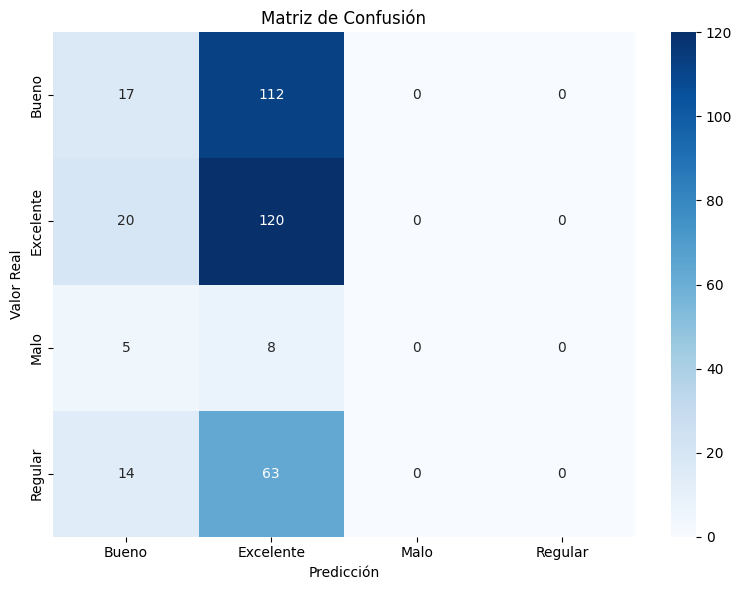

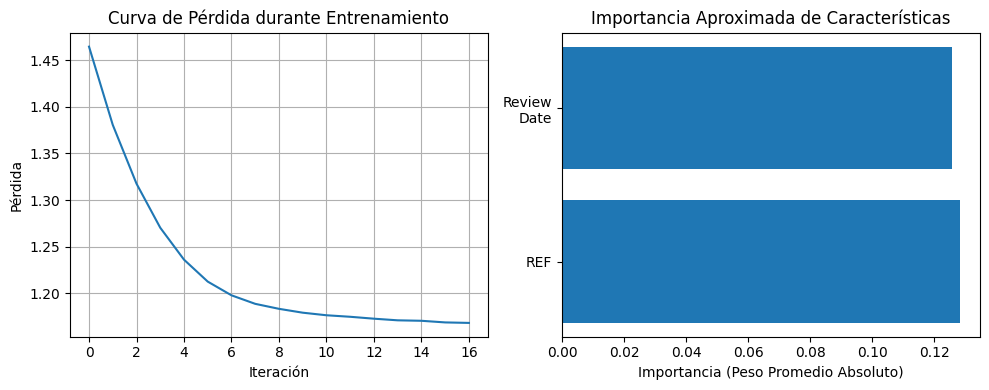


=== RESUMEN ===
✓ Dataset cargado con 1795 muestras
✓ Creadas 4 categorías de calidad
✓ Modelo entrenado con 2 características
✓ Precisión final: 0.3816
✓ Modelo listo para hacer predicciones


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
df = pd.read_csv('flavors_of_cacao.csv')

print(df.head())

def categorize_rating(rating):
    if rating >= 3.5:
        return "Excelente"
    elif rating >= 3.0:
        return "Bueno"
    elif rating >= 2.5:
        return "Regular"
    else:
        return "Malo"

# Crear la variable objetivo categórica
df['Categoria_Calidad'] = df['Rating'].apply(categorize_rating)

print(f"\nDistribución de categorías:")
print(df['Categoria_Calidad'].value_counts())

X = df.select_dtypes(include=['number']).drop('Rating', axis=1)

#NULOS
print(f"\nValores faltantes por columna:")
print(X.isnull().sum())

X = X.fillna(X.mean())

y = df['Categoria_Calidad']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Mapeo de categorías:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{i}: {category}")

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split( X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo MLP para clasificación
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation="relu",
    max_iter=2000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

mlp.fit(X_train_scaled, y_train)

#Predicciones
y_pred_train = mlp.predict(X_train_scaled)
y_pred_test = mlp.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Precisión en entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en prueba: {test_accuracy:.4f}")
print(f"Número de iteraciones: {mlp.n_iter_}")

print(f"\n=== CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred_test, target_names=label_encoder.classes_))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_)
plt.title('Curva de Pérdida durante Entrenamiento')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.grid(True)

# Importancia de características (aproximada usando pesos)
plt.subplot(1, 2, 2)
# Calcular importancia promedio de características
feature_importance = np.abs(mlp.coefs_[0]).mean(axis=1)
feature_names = X.columns

plt.barh(range(len(feature_names)), feature_importance)
plt.yticks(range(len(feature_names)), feature_names)
plt.title('Importancia Aproximada de Características')
plt.xlabel('Importancia (Peso Promedio Absoluto)')
plt.tight_layout()
plt.show()


print(f"\n=== RESUMEN ===")
print(f"✓ Dataset cargado con {df.shape[0]} muestras")
print(f"✓ Creadas {len(label_encoder.classes_)} categorías de calidad")
print(f"✓ Modelo entrenado con {len(X.columns)} características")
print(f"✓ Precisión final: {test_accuracy:.4f}")
print(f"✓ Modelo listo para hacer predicciones")